In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
trip = pd.read_csv('tp_bike/tripCityZip.csv')

In [37]:
#Depuracion de datos
#separo las fechas de las horas
fechaYhora = trip['start_date'].str.split(' ')

In [38]:
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])

In [39]:
trip = trip.assign(date_start = fecha, time_start = hora)

In [40]:
#IDEM pero con la fecha final
fechaYhora = trip['end_date'].str.split(' ')
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])
trip = trip.assign(date_end = fecha, time_end = hora)

In [41]:
#elimino columnas
del trip['start_date']
del trip['end_date']

In [42]:
trip.head(3)

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,start_zip_code,end_city,end_zip_code,date_start,time_start,date_end,time_end
0,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,San Francisco,94107.0,San Francisco,94107.0,8/29/2013,14:13,8/29/2013,14:14
1,4760,113,South Van Ness at Market,66,South Van Ness at Market,66,553,Subscriber,94103,San Francisco,94107.0,San Francisco,94107.0,8/29/2013,17:01,8/29/2013,17:03
2,5070,168,South Van Ness at Market,66,South Van Ness at Market,66,598,Subscriber,94115,San Francisco,94107.0,San Francisco,94107.0,8/29/2013,21:43,8/29/2013,21:46


In [43]:
#le cambio el formato a las fechas
import calendar
trip['date_start'] = pd.to_datetime(trip['date_start'])
trip['date_end'] = pd.to_datetime(trip['date_end'])

In [44]:
trip.head(3)

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,start_zip_code,end_city,end_zip_code,date_start,time_start,date_end,time_end
0,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,14:13,2013-08-29,14:14
1,4760,113,South Van Ness at Market,66,South Van Ness at Market,66,553,Subscriber,94103,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,17:01,2013-08-29,17:03
2,5070,168,South Van Ness at Market,66,South Van Ness at Market,66,598,Subscriber,94115,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,21:43,2013-08-29,21:46


In [45]:
#Lo saco afuera para despues no tener que ejecutar el codigo
# IMPORTANTE, despues de crearlo abrir este trip
#trip.to_csv('tp_bike/tripTransformado.csv',index=False)

In [54]:
# Parseo el tiempo por horas ( calculo solo time_start)
trip['hora'] = trip['time_start'].str.split(':').map(lambda x : int(x[0]))

In [55]:
trip.head(3)

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,start_zip_code,end_city,end_zip_code,date_start,time_start,date_end,time_end,hora
0,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,14:13,2013-08-29,14:14,14
1,4760,113,South Van Ness at Market,66,South Van Ness at Market,66,553,Subscriber,94103,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,17:01,2013-08-29,17:03,17
2,5070,168,South Van Ness at Market,66,South Van Ness at Market,66,598,Subscriber,94115,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,21:43,2013-08-29,21:46,21


In [130]:
horaDuracion = trip.loc[:,['duration','hora']].groupby('hora')['duration'].mean().sort_index()
horaDuracion

hora
0      1710.055274
1      3219.620690
2      4961.296243
3     13079.140351
4      1292.378669
5      1236.354306
6       903.139813
7       670.964178
8       686.206757
9       839.594369
10     1551.466086
11     1805.921073
12     1571.841263
13     1657.015690
14     1760.813669
15     1415.099750
16     1029.543833
17      796.750462
18      855.374974
19      873.457688
20      989.694500
21     2834.713310
22     1226.817057
23     1643.930112
Name: duration, dtype: float64

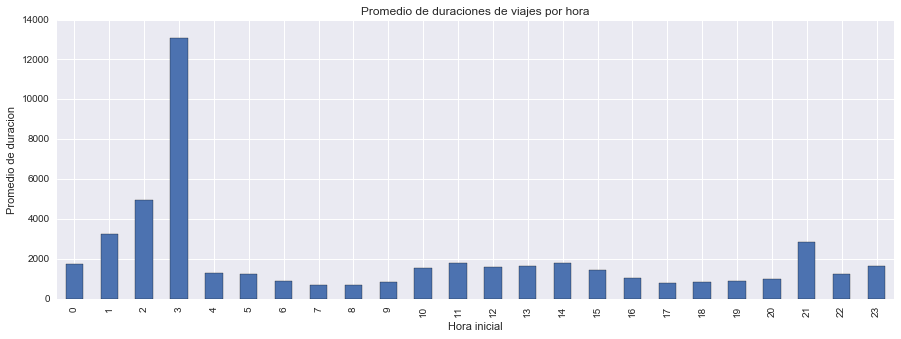

In [170]:
plt.figure()
plt.title('Promedio de duraciones de viajes por hora')
horaDuracion.plot(kind='bar',figsize=(15,5))
plt.xlabel('Hora inicial')
plt.ylabel('Promedio de duracion')

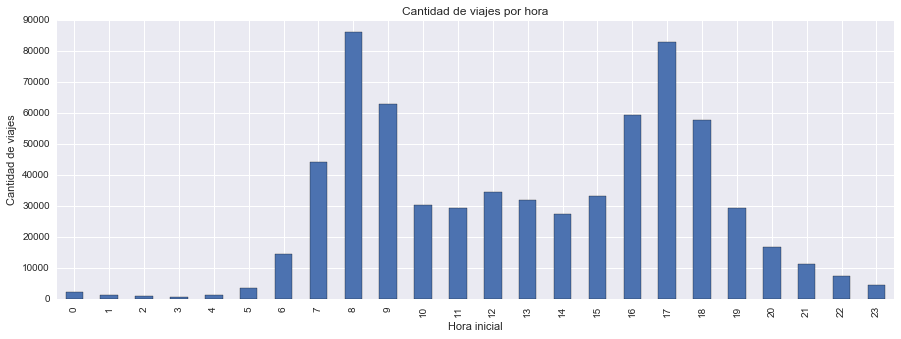

In [171]:
#Se ve en el grafico anterior que el promedio de las 3 am es mucho mayor que los anteriores, verifiquemos las cantidades en total
# Si hay un pico
plt.figure()
plt.title('Cantidad de viajes por hora')
trip['hora'].value_counts().sort_index().plot(kind='bar',figsize=(15,5))
plt.xlabel('Hora inicial')
plt.ylabel('Cantidad de viajes')
#Se puede apreciar que hay muy pocos viajes a las 3 am, tanto asi afecta en el promedio gradualmente 

In [173]:
trip.loc[:,['duration','hora']].sort_values('duration',ascending=False).head(20)
#Se ve que las 21 horas fueron las que tuvieron mas duracion

,duration,hora
170658,17270400,21
554611,2137000,21
662378,1852590,6
659410,1133540,10
658952,722236,13
669828,720454,8
41743,716480,16
635354,715339,5
664687,688899,15
616683,655939,3


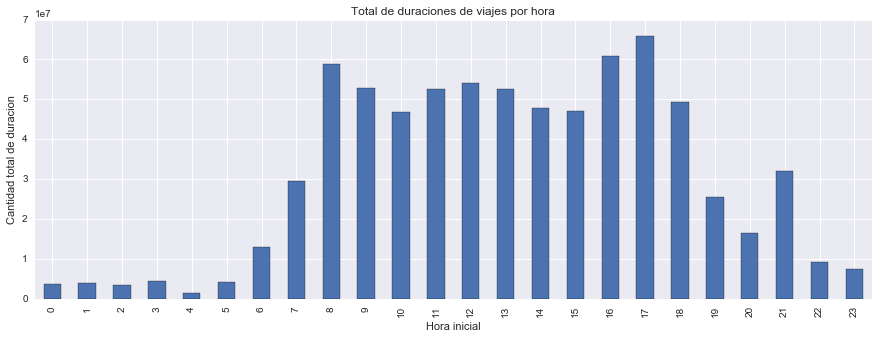

In [172]:
plt.figure()
plt.title('Total de duraciones de viajes por hora')
trip.loc[:,['duration','hora']].groupby('hora')['duration'].sum().sort_index().plot(kind='bar',figsize=(15,5))
plt.xlabel('Hora inicial')
plt.ylabel('Cantidad total de duracion')

# Veo relacion viaje con clima

In [196]:
weather = pd.read_csv('tp_bike/weatherTransformado.csv')

In [197]:
weather.head(3)

,date,max_temperature,mean_temperature,min_temperature,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,year,month,city
0,2013-08-29,23.3,20.0,16.1,61.0,58.0,56.0,93.0,75.0,57.0,...,11.0,28.0,0,4.0,NaN,286.0,94107,2013,8,San Francisco
1,2013-08-30,25.6,20.6,15.6,61.0,58.0,56.0,90.0,70.0,50.0,...,13.0,35.0,0,2.0,NaN,291.0,94107,2013,8,San Francisco
2,2013-08-31,21.7,17.8,13.9,57.0,56.0,54.0,93.0,75.0,57.0,...,15.0,31.0,0,4.0,NaN,284.0,94107,2013,8,San Francisco


In [198]:
weather['events'].count()

522

In [199]:
weather = weather.loc[:,['date','max_temperature','mean_temperature','min_temperature','city','events']]
weather = weather.rename(columns= {'date' : 'date_start','city': 'start_city'})

In [217]:
weather.head(3)

,date_start,max_temperature,mean_temperature,min_temperature,start_city,events
0,2013-08-29,23.3,20.0,16.1,San Francisco,NaN
1,2013-08-30,25.6,20.6,15.6,San Francisco,NaN
2,2013-08-31,21.7,17.8,13.9,San Francisco,NaN


In [201]:
weather['events'].value_counts()

Rain                 388
Fog                  112
Fog-Rain              17
Rain-Thunderstorm      3
rain                   2
Name: events, dtype: int64

In [219]:
weather['date_start'] = pd.to_datetime(weather['date_start'])

In [220]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 6 columns):
date_start          3665 non-null datetime64[ns]
max_temperature     3661 non-null float64
mean_temperature    3661 non-null float64
min_temperature     3661 non-null float64
start_city          3665 non-null object
events              522 non-null object
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 171.9+ KB


# Merge trip con temperaturas

In [208]:
trip.head(3)

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,start_zip_code,end_city,end_zip_code,date_start,time_start,date_end,time_end,hora
0,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,14:13,2013-08-29,14:14,14
1,4760,113,South Van Ness at Market,66,South Van Ness at Market,66,553,Subscriber,94103,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,17:01,2013-08-29,17:03,17
2,5070,168,South Van Ness at Market,66,South Van Ness at Market,66,598,Subscriber,94115,San Francisco,94107.0,San Francisco,94107.0,2013-08-29,21:43,2013-08-29,21:46,21


In [227]:
tripWeather = pd.merge(trip,weather,on=['date_start','start_city'],how='left')

In [230]:
tripWeather.head(3)

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,...,end_zip_code,date_start,time_start,date_end,time_end,hora,max_temperature,mean_temperature,min_temperature,events
0,4576,63,South Van Ness at Market,66,South Van Ness at Market,66,520,Subscriber,94127,San Francisco,...,94107.0,2013-08-29,14:13,2013-08-29,14:14,14,23.3,20.0,16.1,NaN
1,4760,113,South Van Ness at Market,66,South Van Ness at Market,66,553,Subscriber,94103,San Francisco,...,94107.0,2013-08-29,17:01,2013-08-29,17:03,17,23.3,20.0,16.1,NaN
2,5070,168,South Van Ness at Market,66,South Van Ness at Market,66,598,Subscriber,94115,San Francisco,...,94107.0,2013-08-29,21:43,2013-08-29,21:46,21,23.3,20.0,16.1,NaN


In [262]:
cor = tripWeather.loc[:,['duration','mean_temperature']].corr().abs()
cor

,duration,mean_temperature
duration,1.000000,0.002696
mean_temperature,0.002696,1.000000


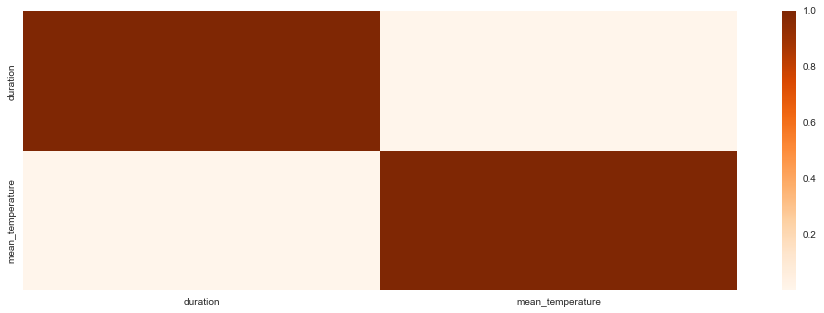

In [265]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,5));
cor = tripWeather.loc[:,['duration','mean_temperature']].corr().abs()
#cor.values[[np.arange(2)]*2] = 0
sns.heatmap(cor,cmap='Oranges')
# en el heatmap se nota claramente que no hay correlacion entre duracion y temperatura media

In [266]:
tripWeather.groupby('events').count()

,id,duration,start_station_name,start_station_id,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_city,...,end_city,end_zip_code,date_start,time_start,date_end,time_end,hora,max_temperature,mean_temperature,min_temperature
events,,,,,,,,,,,,,,,,,,,,,
Fog,42919,42919,42919,42919,42919,42919,42919,42919,42414,42919,...,42107,42107,42919,42919,42919,42919,42919,42919,42919,42919
Fog-Rain,6733,6733,6733,6733,6733,6733,6733,6733,6730,6733,...,6576,6576,6733,6733,6733,6733,6733,6733,6733,6733
Rain,69865,69865,69865,69865,69865,69865,69865,69865,69514,69865,...,68541,68541,69865,69865,69865,69865,69865,69865,69865,69865
Rain-Thunderstorm,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,...,1405,1405,1440,1440,1440,1440,1440,1440,1440,1440
rain,498,498,498,498,498,498,498,498,496,498,...,498,498,498,498,498,498,498,498,498,498


In [269]:
# Veo el promedio de duracion de viaje en dias de temperatura mayor a 25°
tripWeather.loc[tripWeather.max_temperature >= 25,'duration'].mean()

1162.633802146319

In [270]:
# Veo el promedio de duracion de viaje en dias de temperatura menor a 10°
tripWeather.loc[tripWeather.min_temperature <= 10,'duration'].mean()

1054.6265965407574